In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
filename = "USvideos.csv"
df = pd.read_csv(filename)

In [3]:
n_data = df.shape[0]
feature_list = df.columns
print("the number of video data is:", n_data)
print("features are:", feature_list)
print("the number of features are:", len(feature_list))

the number of video data is: 40949
features are: Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')
the number of features are: 16


In [4]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [5]:
df.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

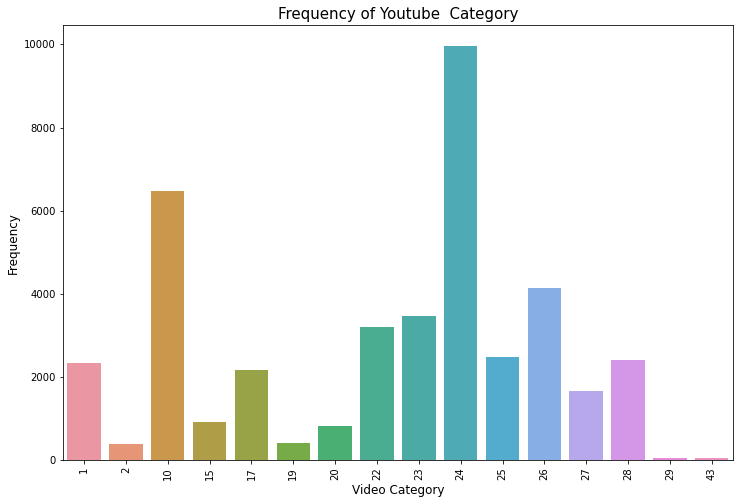

In [6]:
plt.figure(figsize=(12,8))
sns.countplot(x="category_id", data=df)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Video Category', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Youtube  Category", fontsize=15)
plt.show()

In [7]:
df['category_name'] = np.nan

df.loc[(df["category_id"] == 1),"category_name"] = 'Film and Animation'
df.loc[(df["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
df.loc[(df["category_id"] == 10),"category_name"] = 'Music'
df.loc[(df["category_id"] == 15),"category_name"] = 'Pets and Animals'
df.loc[(df["category_id"] == 17),"category_name"] = 'Sport'
df.loc[(df["category_id"] == 19),"category_name"] = 'Travel and Events'
df.loc[(df["category_id"] == 20),"category_name"] = 'Gaming'
df.loc[(df["category_id"] == 22),"category_name"] = 'People and Blogs'
df.loc[(df["category_id"] == 23),"category_name"] = 'Comedy'
df.loc[(df["category_id"] == 24),"category_name"] = 'Entertainment'
df.loc[(df["category_id"] == 25),"category_name"] = 'News and Politics'
df.loc[(df["category_id"] == 26),"category_name"] = 'How to and Style'
df.loc[(df["category_id"] == 27),"category_name"] = 'Education'
df.loc[(df["category_id"] == 28),"category_name"] = 'Science and Technology'
df.loc[(df["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
df.loc[(df["category_id"] == 25),"category_name"] = 'News & Politics'

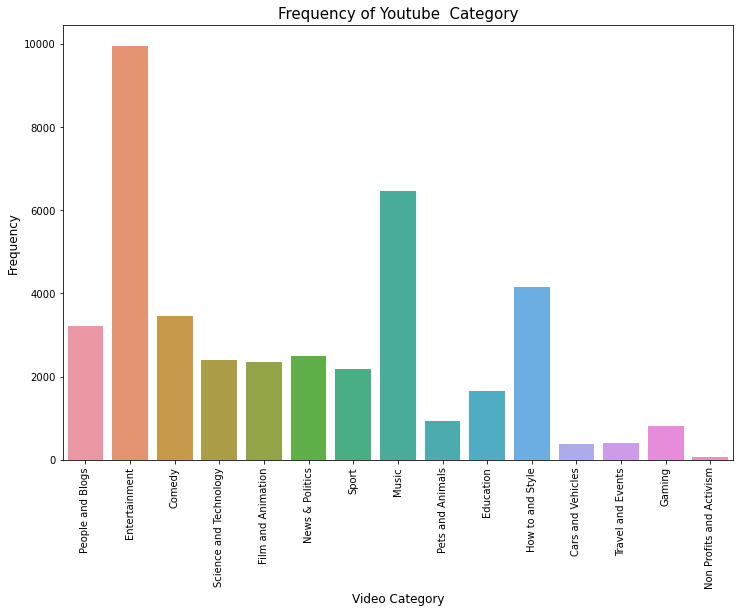

In [8]:
plt.figure(figsize=(12,8))
sns.countplot(x="category_name", data=df)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Video Category', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of Youtube  Category", fontsize=15)
plt.show()

In [9]:
df['like_rate'] =  df ['likes'] / df['views'] * 100
df['dislike_rate'] =  df ['dislikes'] / df['views'] * 100
df['like_ratio'] =  df ['dislikes'] / df['likes'] * 100

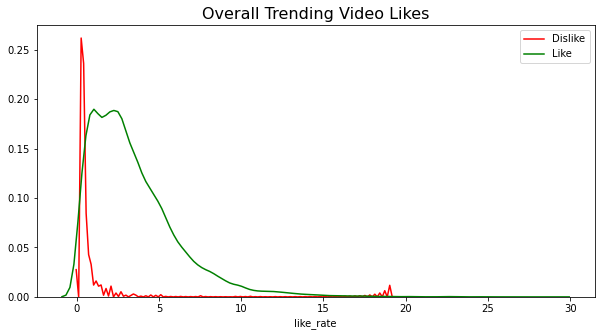

In [10]:
plt.figure(figsize = (10,5))

g1 = sns.distplot(df['dislike_rate'], color='red',hist=False, label="Dislike")
g1 = sns.distplot(df['like_rate'], color='green',hist=False, label="Like")
g1.set_title('Overall Trending Video Likes', fontsize=16)
plt.legend()
plt.show()

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer(stop_words='english')
x = v.fit_transform(df['title'])
terms = v.get_feature_names()
mapping = {}
for x in range (len(terms)):
    mapping[x] = [terms[x]]
title_words = mapping.keys()
df2 = pd.DataFrame.from_dict(mapping)


In [31]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(stop_words = 'english').fit(df['title'])
bag_of_words = vec.transform(df['title'])
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
freq_titles = words_freq[:30]
top_titles = []
for a_tuple in freq_titles:
    top_titles.append(a_tuple[0])
print(top_titles)

['official', 'video', '2018', 'trailer', 'ft', 'vs', '2017', 'new', 'makeup', 'audio', 'music', 'hd', 'live', 'day', '10', 'challenge', 'game', 'black', 'star', 'world', 'make', 'lyric', 'time', 'love', 'movie', 'season', 'best', 'teaser', 'christmas', 'like']


In [30]:
vec1 = CountVectorizer(stop_words = 'english').fit(df['tags'])
bag_of_words = vec1.transform(df['tags'])
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
freq_tags = words_freq[:30]
top_tags = []
for a_tup in freq_tags:
    top_tags.append(a_tup[0])
print(top_tags)

['video', 'makeup', 'funny', 'new', '2018', 'music', 'news', 'food', 'comedy', 'trailer', 'youtube', 'movie', 'best', 'live', 'official', 'challenge', 'black', 'tutorial', 'tv', 'game', 'review', 'vs', 'life', 'star', 'world', '2017', 'interview', 'late', 'make', 'iphone']


In [46]:
from collections import Counter
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['channel_title'])
feature_array = np.array(vectorizer.get_feature_names())
count = Counter(feature_array)
most_common = count.most_common()
top_channels = []
for tup in most_common:
    top_channels.append(tup[0])
print(top_channels)
#tfidf_sorting = np.argsort(response.toarray()).flatten()[::-1]
#n = 20
#top_channels = feature_array[tfidf_sorting][:n]

['105', '12', '17', '1975', '1million', '1thek', '2077', '20th', '21st', '2cellos', '2x', '3000', '3blue1brown', '3d', '42fab', '45', '494ta', '4given4ever1', '52', '5fdpvevo', '5madmoviemakers', '5sosvevo', '60', '717', '730', '76ers', '90s', '96hournews', '97', 'a24', 'aaronsanimals', 'abc', 'abc7', 'abhishek', 'abo', 'about', 'abrahammateovevo', 'abrams', 'abroad', 'absolut', 'acaciacutie', 'academy', 'access', 'ace', 'action', 'actis', 'adam', 'adams', 'adelainemorin', 'adidas', 'adriene', 'adult', 'advanced', 'adventure', 'aerie', 'afp', 'africa', 'against', 'agency', 'aguilera', 'aia', 'aid', 'aina', 'aiono', 'air', 'airlines', 'airpano', 'aka', 'akana', 'akidearest', 'al', 'alabama', 'alan', 'albert', 'alchemist', 'alec', 'alesso', 'alex', 'alexander', 'alicia', 'alishamarie', 'alishamarievlogs', 'alisonwonderlandvevo', 'alissa', 'all', 'alliance', 'allie', 'allure', 'almazankitchen', 'alpha', 'alt', 'alternatives', 'alto', 'altuğ', 'am', 'amanda', 'amandamoor', 'amarullah', 'am